<a href="https://colab.research.google.com/github/ZongZong0210/MarketDataScience/blob/master/%E8%B3%87%E8%A8%8A%E7%A7%91%E5%AD%B8%E6%A6%82%E8%AB%96%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1113作業-關聯規則

In [ ]:
# 下載套件
!pip install efficient-apriori
!pip install apyori

In [ ]:
from efficient_apriori import apriori
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori
from google.colab import drive

In [ ]:
drive.mount('/content/drive/') #與google drive牽連再一起
!ls /content/drive/"My Drive"/"學校功課"/"Colab Notebooks"/
# 載入檔案
df = pd.read_csv('/content/drive/My Drive/學校功課/Colab Notebooks/資料/Groceries_dataset.csv')
df.head()

In [ ]:
df.shape #找出共有38765筆資料，並且共有3行

In [ ]:
df.info()  #找出該欄位的屬性

In [ ]:
df.Date = pd.to_datetime(df.Date) 
df['Year'] = df.Date.apply(lambda x : x.year)
df['Month'] = df.Date.apply(lambda x : x.month)
df['Days of Week'] = df.Date.apply(lambda x : x.dayofweek)
df.nunique()

In [ ]:
sns.countplot(df.Year)
plt.show()

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(df.Month)
plt.show()
plt.figure(figsize=(12,4))
sns.countplot(df.Month,hue=df.Year)
plt.show()

In [ ]:
df[df['Year']==2014].groupby('Month').count()['Date'].plot(label=2014,figsize=(12,4))
df[df['Year']==2015].groupby('Month').count()['Date'].plot(label=2015)
plt.xticks([i for i in range(1,13)])
plt.legend()
plt.show()

In [ ]:
df.itemDescription.value_counts().head(15).plot(kind='bar',figsize=(15,6))
plt.show()

In [ ]:
dummies = pd.get_dummies(df.itemDescription)
dummies.head()
df = df.join(dummies)

In [ ]:
df.head()
item = df.itemDescription.unique()


In [ ]:
df = df.groupby(['Member_number','Date'])[item[:]].sum()
df.head(10)

In [ ]:
df = df.reset_index() #整理表格，將member_number與date向上合併
df.head(10)

In [ ]:
df = df.drop(['Member_number','Date'],axis=1)  #將不要的欄位丟去
df.head(10)

In [ ]:
temp = df.copy()
x = 0
for i in range(len(temp)):
    for j in (temp.columns):
        if temp.loc[i,j]> x:
            temp.loc[i,j]=j
temp.head(10)

In [ ]:
x = temp.values
x = [sub[~(sub == 0)].tolist() for sub in x if sub[sub != 0].tolist()]
transactions = x

In [ ]:
rules = apriori(transactions,min_support=0.0004,min_confidance=0.06,min_lift=3,target="rules")
association_results = list(rules)
print(association_results[1])

In [ ]:
# 使用關聯規則演算法
itemsets, rules = apriori(X, min_support=0.003, min_confidence=0.2)
list(rules)

# 1120作業-分群

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_mutual_info_score
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [ ]:
drive.mount('/content/drive/') #與google drive牽連再一起
!ls /content/drive/"My Drive"/"學校功課"/"Colab Notebooks"/
# 載入檔案
df = pd.read_csv('/content/drive/My Drive/學校功課/Colab Notebooks/資料/UCI_Credit_Card.csv')
df.head()

Mounted at /content/drive/
'「1091 資料科學_應用習題」的副本'   20200713_1.ipynb   Untitled
 20200709.ipynb			     20200713.ipynb     Untitled0.ipynb
 20200711.ipynb			     20200714_1.ipynb   資料


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# 使用info查看資料架構
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.shape

(30000, 25)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
for i in ['SEX','EDUCATION','MARRIAGE'] :
    print(df[i].value_counts())
    print()

2    18112
1    11888
Name: SEX, dtype: int64

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64



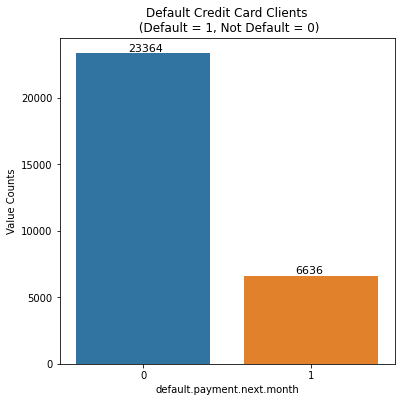

In [ ]:
banyak = df['default.payment.next.month'].value_counts()
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients\n (Default = 1, Not Default = 0)')
sns.barplot(x = banyak.index, y = banyak.values)
for i, v in enumerate(banyak.values):
    plt.text(i-.09 , v + 150, str(v),fontsize=11)
plt.xlabel('default.payment.next.month')
plt.ylabel('Value Counts')
plt.show()

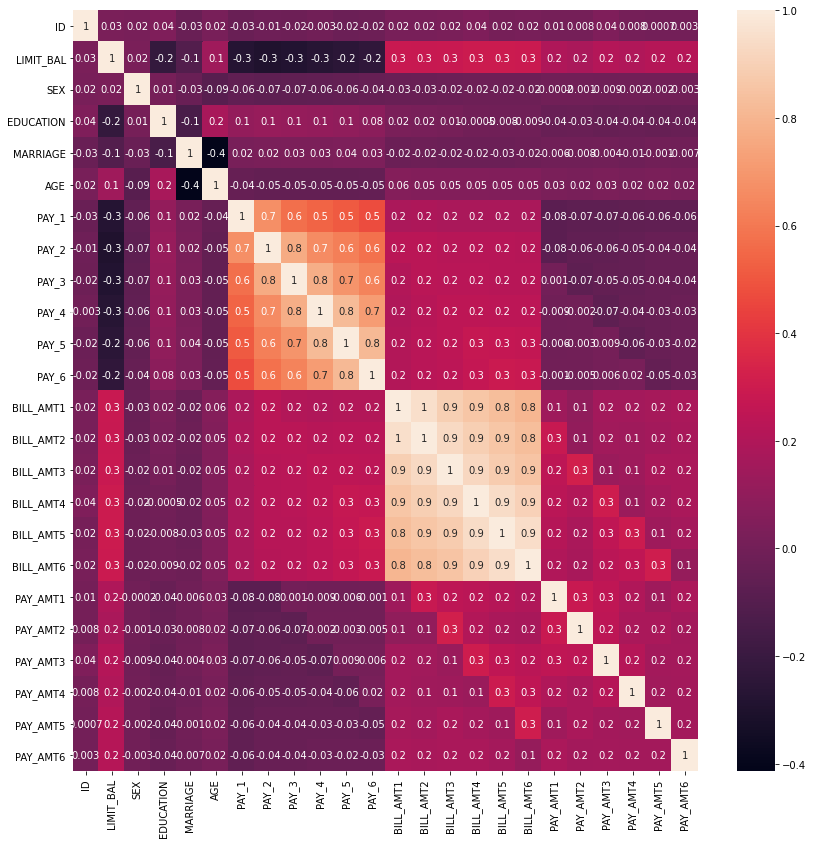

In [ ]:
df.rename(columns = {'PAY_0':'PAY_1','default.payment.next.month':'default'}, inplace=True)
y_target = df['default']
x_features = df.drop('default', axis=1)
corr = x_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [ ]:
cols_bill = ['BILL_AMT' + str(i) for i in range(1, 7)]
print('目標屬性:', cols_bill)

# 創建PCA目標項並進行擬合以計算
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(x_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA組件的變異率:', pca.explained_variance_ratio_)

目標屬性: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA組件的變異率: [0.90555253 0.0509867 ]


In [ ]:
rcf = RandomForestClassifier(n_estimators=300,random_state=156)
scores = cross_val_score(rcf, x_features, y_target, scoring='accuracy', cv=3)

print('CV=3時，各組精度', scores)
print('平均準確度: {0:.4f}'.format(np.mean(scores)))


CV=3時，各組精度 [0.257  0.8209 0.784 ]
平均準確度: 0.6206


In [ ]:
df = df.drop(['ID','default'],axis=1)  #將不要的欄位丟去
df = df.dropna(axis=0)

pca = PCA(n_components=2)
df = pca.fit_transform(df)
print(pca)
print(df)

NameError: ignored

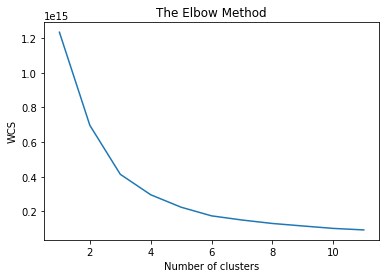

In [ ]:
# 算出最適分群數
wcs = []
for i in range(1, 12):
  kmeans = KMeans(n_clusters= i, random_state= 42)
  kmeans.fit(df)
  wcs.append(kmeans.inertia_)

plt.plot(range(1, 12), wcs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCS')
plt.show()

In [ ]:
# 將模型分群數調至2
kmeans = KMeans(n_clusters= 2, random_state= 42)

# 建立模型並預測
kms_predict = kmeans.fit_predict(df)

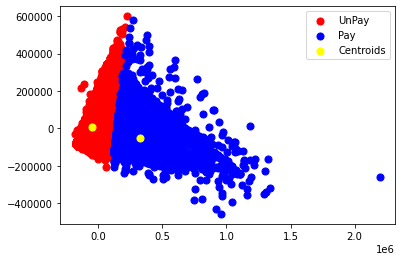

In [ ]:
# 印出各群
plt.scatter(df[kms_predict == 0, 0], df[kms_predict == 0, 1], s = 50, c = 'red', label = 'UnPay')
plt.scatter(df[kms_predict == 1, 0], df[kms_predict == 1, 1], s = 50, c = 'blue', label = 'Pay')
# plt.scatter(df[kms_predict == 2, 0], df[kms_predict == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

# 印出群心
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

In [ ]:
!echo "# -hw" >> README.md
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/ZongZong0210/-hw.git
!git push -u origin main

Initialized empty Git repository in /content/.git/
[master (root-commit) fcc35c6] first commit
 1 file changed, 1 insertion(+)
 create mode 100644 README.md
fatal: could not read Username for 'https://github.com': No such device or address


# 1127作業-分類


In [12]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.model_selection import LearningCurve

from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import validation_curve
from sklearn import tree

from yellowbrick.model_selection import ValidationCurve
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassBalance
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import DiscriminationThreshold


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [4]:
drive.mount('/content/drive/') #與google drive牽連再一起
!ls /content/drive/"My Drive"/"學校功課"/"Colab Notebooks"/
# 載入檔案
df = pd.read_csv('/content/drive/My Drive/學校功課/Colab Notebooks/資料/UCI_Credit_Card.csv')
print(df.head())
print(df.shape)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
'「1091 資料科學_應用習題」的副本'   20200713_1.ipynb   Untitled
 20200709.ipynb			     20200713.ipynb     Untitled0.ipynb
 20200711.ipynb			     20200714_1.ipynb   資料
   ID             ...              default.payment.next.month
0   1             ...                                       1
1   2             ...                                       1
2   3             ...                                       0
3   4             ...                                       0
4   5             ...                                       0

[5 rows x 25 columns]
(30000, 25)


In [5]:
# 使用info查看資料架構
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [6]:
df.rename(columns = {'PAY_0':'PAY_1','default.payment.next.month':'default'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
default      30000 non-null int64
dtypes: float64

In [ ]:
for i in ['SEX','EDUCATION','MARRIAGE'] :
    print(df[i].value_counts())
    print()

2    18112
1    11888
Name: SEX, dtype: int64

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64



2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8bef64828>]],
      dtype=object)

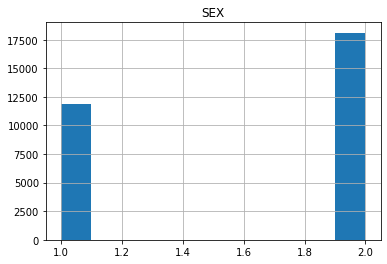

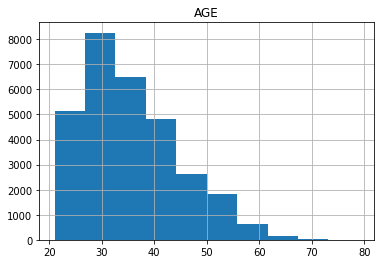

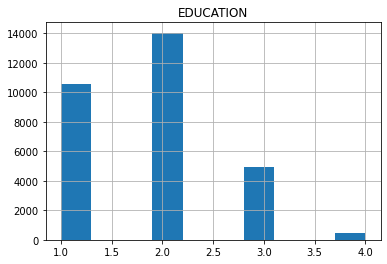

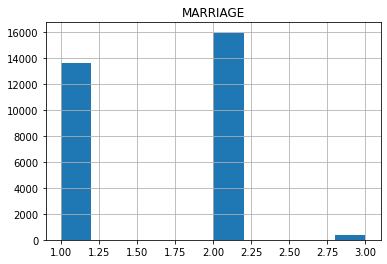

In [ ]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
print(df['EDUCATION'].value_counts())

fil = (df['MARRIAGE'] == 0)
df.loc[fil, 'MARRIAGE'] = 3
print(df['MARRIAGE'].value_counts())

df.hist('SEX')
df.hist('AGE')
df.hist('EDUCATION')
df.hist('MARRIAGE')

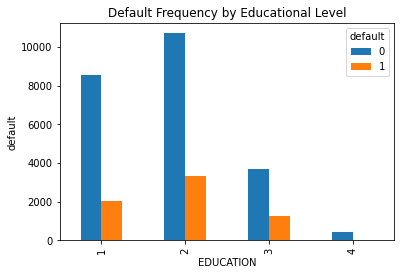

In [ ]:
pd.crosstab(df.EDUCATION,df.default).plot(kind='bar')
plt.title('Default Frequency by Educational Level')
plt.xlabel('EDUCATION')
plt.ylabel('default')
plt.show()

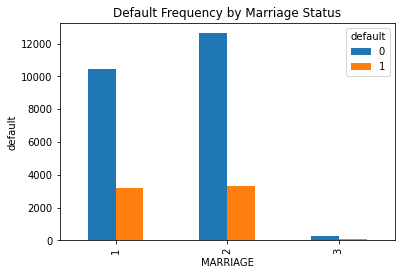

In [ ]:
# Marriage
# 1: 已婚、2：未婚、3：其他

pd.crosstab(df.MARRIAGE,df.default).plot(kind='bar')
plt.title('Default Frequency by Marriage Status')
plt.xlabel('MARRIAGE')
plt.ylabel('default')
plt.show()

In [ ]:
X=df.drop("default",axis=1)
y=df["default"]

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [85]:
rfc=RandomForestClassifier()
model=rfc.fit(X_train,y_train)
predictions=model.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.62      0.35      0.45      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

[[6613  427]
 [1269  691]]


In [87]:
print("accuracy:",accuracy_score(y_test,predictions))
print("precision:",precision_score(y_test,predictions))
print("recall:",recall_score(y_test,predictions))
print("error:",mean_squared_error(y_test, predictions))

accuracy: 0.8115555555555556
precision: 0.6180679785330948
recall: 0.3525510204081633
error: 0.18844444444444444


In [88]:
q = df.drop(columns=['ID','default'])
w = df.default
q = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(q,w,test_size = 0.3, random_state=42)
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train,y_train)
dt.score(X_test, y_test)
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
dt.fit(X_train,y_train)
dt.score(X_test, y_test)




0.82

In [ ]:
print("Decision Tree accuracy : ", accuracy_score(y_test, dt.predict(X_test)))
print("Decision Tree recall : ", recall_score(y_test, dt.predict(X_test)))
print("Decision Tree precision : ", precision_score(y_test, dt.predict(X_test)))

Decision Tree accuracy :  0.82
Decision Tree recall :  0.3051020408163265
Decision Tree precision :  0.6985981308411215


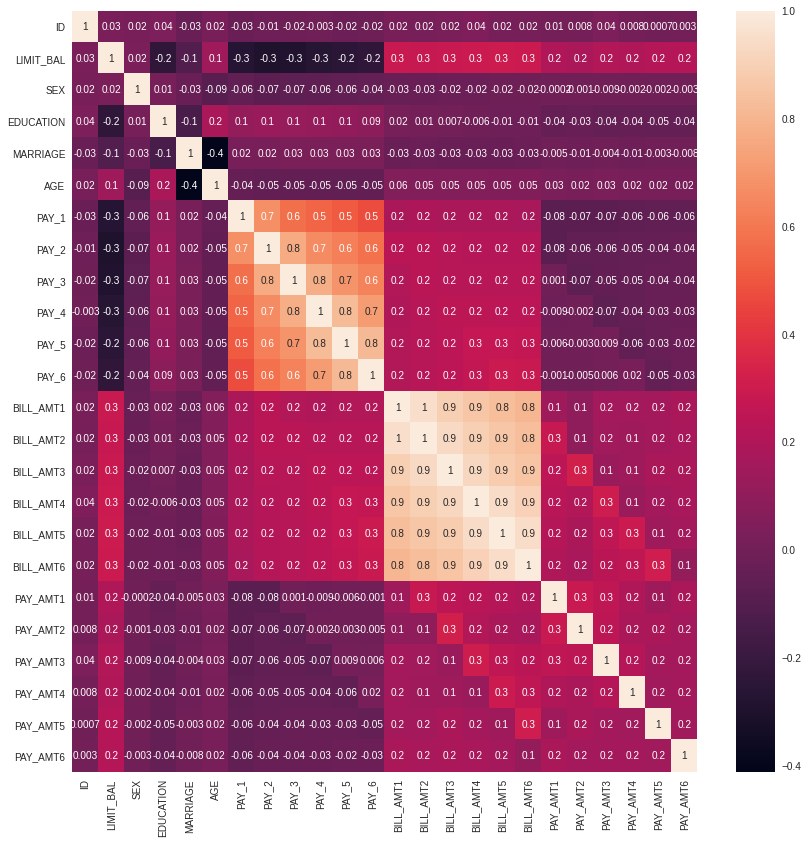

In [ ]:
y_target = df['default']
x_features = df.drop('default', axis=1)
corr = x_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [90]:
for col, val in sorted(zip(X.columns, dt.feature_importances_),key=lambda x: x[1], reverse=True)[:5]:print(f"{col:10}{val:10.3f}")



PAY_1          0.779
PAY_2          0.158
PAY_AMT3       0.049
PAY_3          0.013
LIMIT_BAL      0.000


0.82

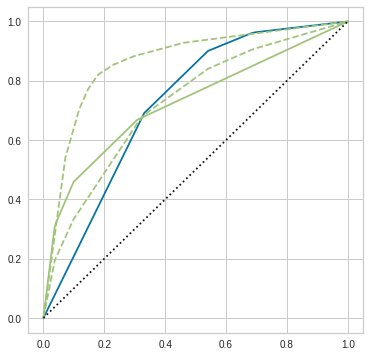

In [89]:
fig, ax = plt.subplots(figsize=(6,6))
roc_viz = ROCAUC(dt)
roc_viz.score(X_test,y_test)

In [9]:
drop_col = ["ID",'LIMIT_BAL']
df = df.drop(drop_col, axis=1)

In [10]:
X = df.iloc[:,1:]
y = df.iloc[:,:1]

# 切出訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 10.49355583
Iteration 2, loss = 9.94465297
Iteration 3, loss = 9.84680587
Iteration 4, loss = 9.92086081
Iteration 5, loss = 9.63810142
Iteration 6, loss = 9.58945951
Iteration 7, loss = 9.40630626
Iteration 8, loss = 9.47833258
Iteration 9, loss = 9.29278885
Iteration 10, loss = 9.48799305
Iteration 11, loss = 9.47446689
Iteration 12, loss = 9.17443637
Iteration 13, loss = 9.38136359
Iteration 14, loss = 9.25969840
Iteration 15, loss = 9.04812347
Iteration 16, loss = 9.14799687
Iteration 17, loss = 9.53239900
Iteration 18, loss = 9.08654114
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
-------RandomForest-------
acc=0.5736666666666667
f1=0.46041344396006184
-------DecsionTree-------
acc=0.5543333333333333
f1=0.4472922695328648
-------Ann-------
acc=0.5376666666666666
f1=0.34831636648394676
confusion martix


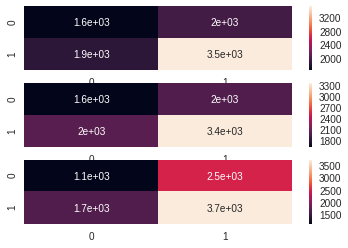

In [14]:
# 載入模型
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

tr = tree.DecisionTreeClassifier(random_state=42)
tr.fit(X_train, y_train)

ann = MLPClassifier(random_state=42, verbose=True)
ann.fit(X_train, y_train)

# 預測
rf_predict = rf.predict(X_test)
tr_predict = tr.predict(X_test)
ann_predict = ann.predict(X_test)

# 模型效能指標
rf_acc = accuracy_score(y_test, rf_predict)
rf_f1 = f1_score(y_test, rf_predict)
tr_acc = accuracy_score(y_test, tr_predict)
tr_f1 = f1_score(y_test, tr_predict)
ann_acc = accuracy_score(y_test, ann_predict)
ann_f1 = f1_score(y_test, ann_predict)

# 混淆矩陣
rf_confusion = confusion_matrix(y_test, rf_predict)
tr_confusion = confusion_matrix(y_test, tr_predict)
ann_confusion = confusion_matrix(y_test, ann_predict)


print("-------RandomForest-------")
print("acc={}".format(rf_acc))
print("f1={}".format(rf_f1))

print("-------DecsionTree-------")
print("acc={}".format(tr_acc))
print("f1={}".format(tr_f1))

print("-------Ann-------")
print("acc={}".format(ann_acc))
print("f1={}".format(ann_f1))


print("confusion martix")
fig, ax = plt.subplots(nrows=3)
sns.heatmap(rf_confusion, annot=True, ax=ax[0])
sns.heatmap(tr_confusion, annot=True, ax=ax[1])
sns.heatmap(ann_confusion, annot=True, ax=ax[2])